In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# 1. Loading a dataset

We load the dataset with the help of seaborn. Seaborn has a handful function-call to help us easily download and download some sample datasets.

However, we could have loaded the dataset from a csv using:
~~~  
titanic = pd.read_csv("filepath/filename.csv")
~~~  

In [ ]:
titanic = pd.read_csv('../data/raw/titanic.csv')

# Getting some stats (first things to do)
- see the dataframe
- .describe()
- check for missing values

In [40]:
titanic.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [41]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [42]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


# Plotting with pandas internal plot functions



## Plotting all distributions with one command (histogram)
https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.hist.html


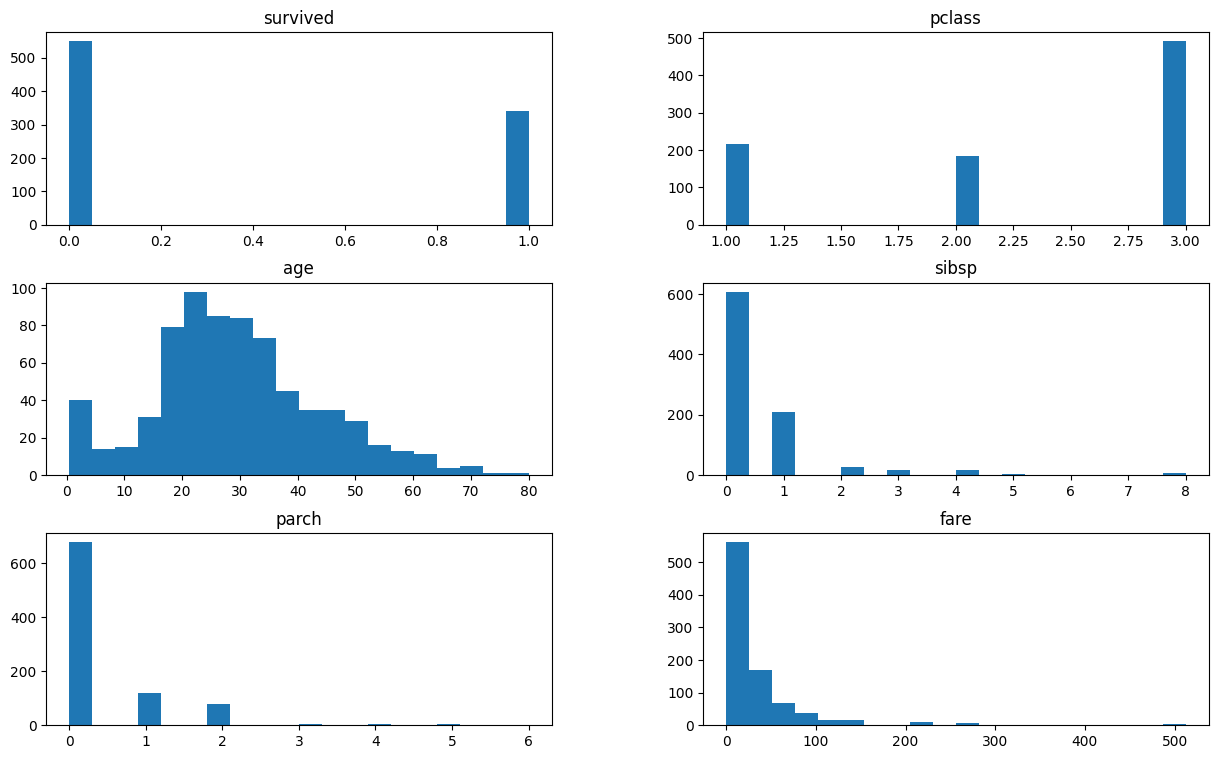

In [6]:
titanic.hist(bins=20,figsize=(15,9),grid=False);
plt.show()

## Histogram of a column
https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.hist.html

How was the age distributed ? 

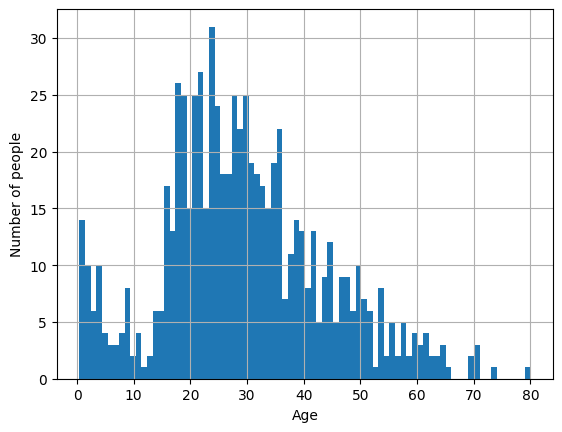

In [7]:
titanic.age.hist(bins = 80) # or fare, etc...
plt.xlabel("Age")
plt.ylabel("Number of people")
plt.show()

## Other plots supported by Pandas
https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html
~~~
kind = 
‘line’ : line plot (default)
‘bar’ : vertical bar plot
‘barh’ : horizontal bar plot
‘hist’ : histogram
‘box’ : boxplot
‘kde’ : Kernel Density Estimation plot
‘area’ : area plot
‘pie’ : pie plot
‘scatter’ : scatter plot
‘hexbin’ : hexbin plot
~~~

### Pie/Bar charts on value_counts()
- How many people we had per class ? 
- How many people did we have per "who" ? 


<Axes: xlabel='class'>

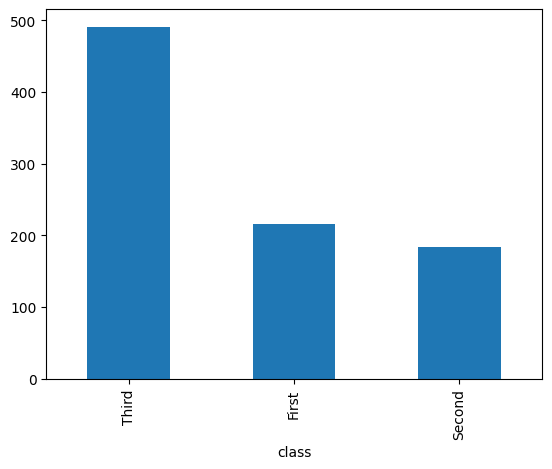

In [8]:
titanic['class'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

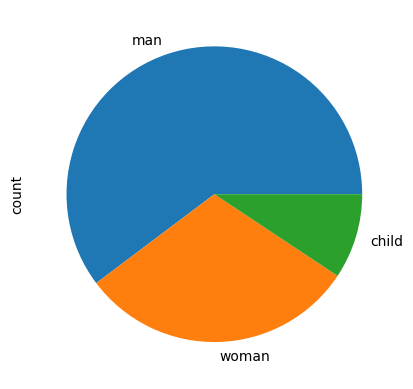

In [9]:
titanic.who.value_counts().plot(kind = 'pie')

## Groupby and Plotting 
- What was the mean survival rate per class ? 
- What was the mean survival rate per gender ? 


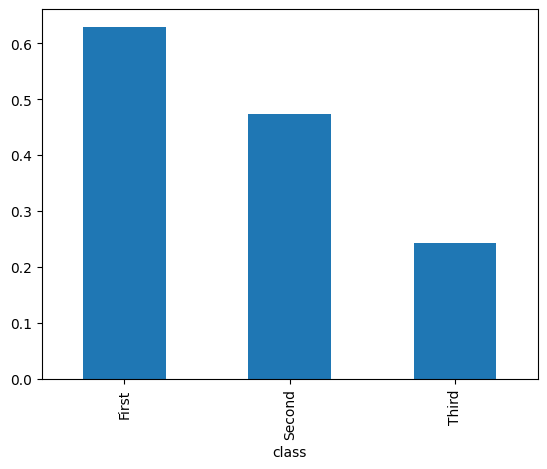

In [10]:
titanic.groupby('class').survived.mean().plot(kind = 'bar')
plt.show()

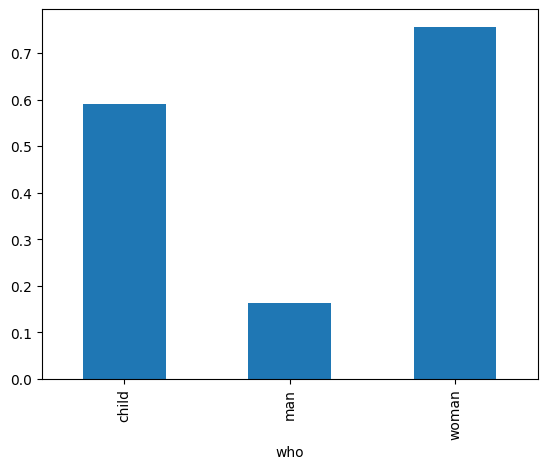

In [11]:
titanic.groupby('who').survived.mean().plot(kind = 'bar')
plt.show()

# Data exploration with seaborn
https://seaborn.pydata.org/examples/index.html

Seaborn automates a lot of groupby/aggregation operations and it support many different types of graphs

- No need for groupby /value counts
- Automatic labels on x-y axis
- More color palletes
- nested groupbys
- more types of graphs
- Ability to plot multiple graphs per figure easily 


## CountPlots
http://seaborn.pydata.org/generated/seaborn.countplot.html<br>
Counts per group

- How many people were aboard per class ? 
- How many people were aboard per gender ? 
- How many were aboard class and then per gender ? 
- How many people we have per class per deck ?
- How many people survived per class ? 
- How many people survived per gender ? 

<Axes: xlabel='class', ylabel='count'>

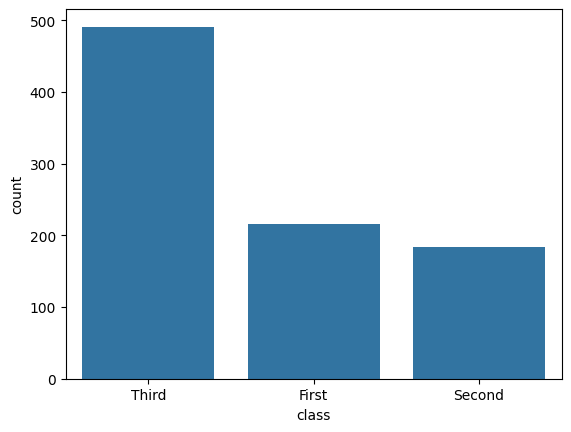

In [12]:
sns.countplot(x='class', data=titanic)

<Axes: xlabel='who', ylabel='count'>

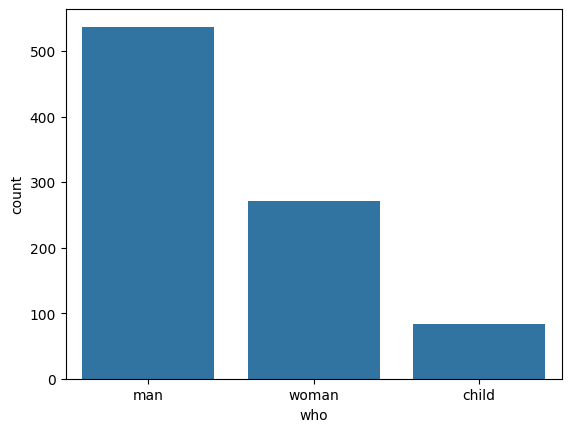

In [13]:
sns.countplot(x='who', data=titanic)

<Axes: xlabel='class', ylabel='count'>

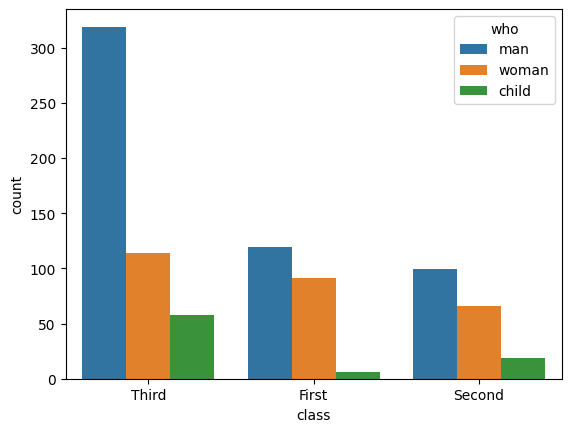

In [14]:
sns.countplot(x='class', hue='who', data=titanic)

<Axes: xlabel='deck', ylabel='count'>

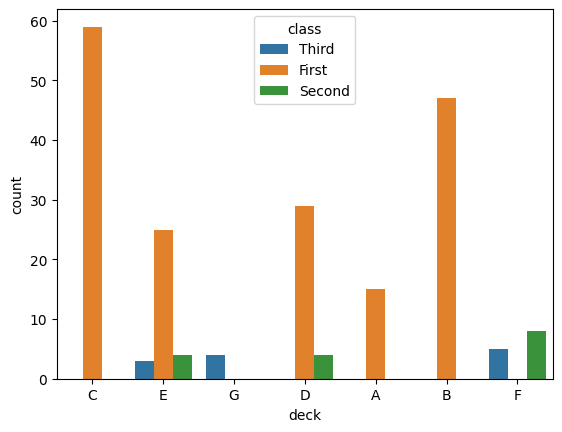

In [15]:
sns.countplot(x='deck', hue='class', data=titanic)

<Axes: xlabel='class', ylabel='count'>

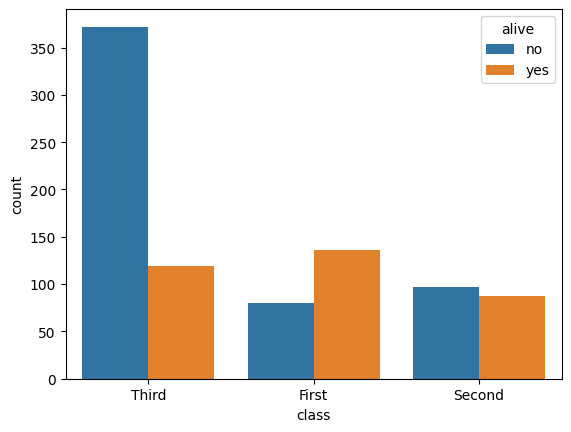

In [16]:
sns.countplot(x='class', hue='alive', data=titanic)

<Axes: xlabel='who', ylabel='count'>

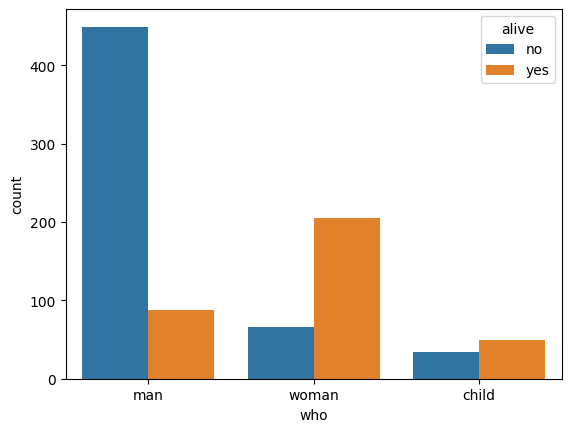

In [17]:
sns.countplot(x='who', hue='alive', data=titanic)

## Barplots
http://seaborn.pydata.org/generated/seaborn.barplot.html<br>
Means per group (can be configured)

- Did the class of travel matter for survival ? 
- Did the gender matter for survival ?
- Did the deck matter for survival ? 
- Did the class and then gender matter for survival ? 

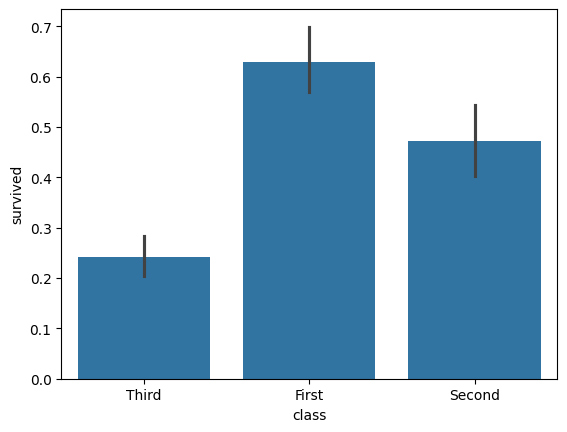

In [18]:
sns.barplot(x='class', y="survived", data=titanic)
plt.show()

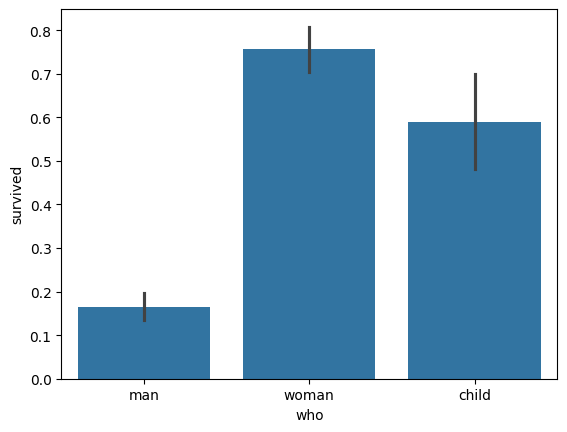

In [19]:
sns.barplot(x='who', y="survived", data=titanic)
plt.show()

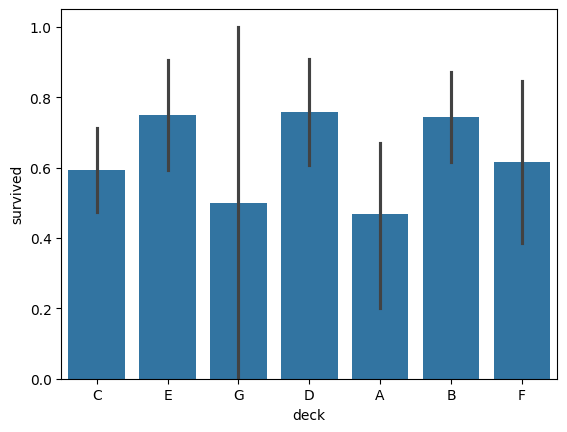

In [20]:
sns.barplot(x='deck', y="survived", data=titanic)
plt.show()

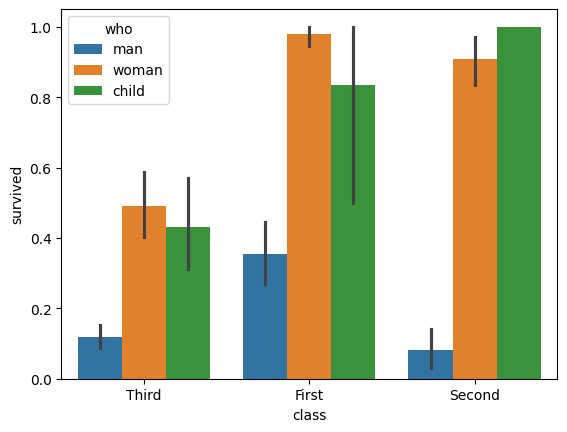

In [21]:
sns.barplot(x='class', hue='who', y="survived", data=titanic)
plt.show()

## Boxplots: Visualizing distributions
http://seaborn.pydata.org/generated/seaborn.boxplot.html<br>
A box plot  shows the distribution of quantitative data. The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution, except for points that are determined to be “outliers” (1.5*IQR).

- Where 1st class people older  ?
- Where women younger ? 
- What is the age distribution per class and per gender ? 
- Did age matter for survival ? 
- Did paying more make any difference in survival ? 

<Axes: xlabel='class', ylabel='age'>

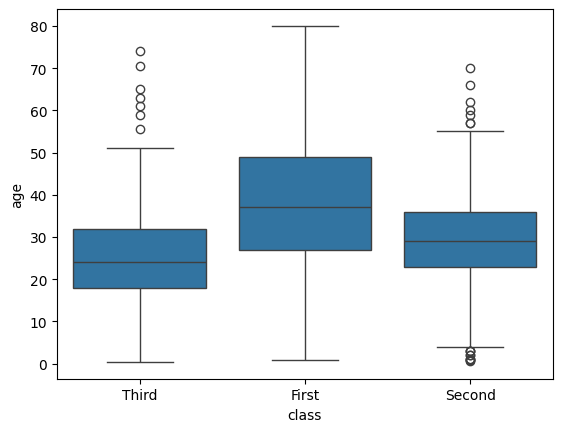

In [22]:
sns.boxplot(x='class', y = 'age', data = titanic)

<Axes: xlabel='who', ylabel='age'>

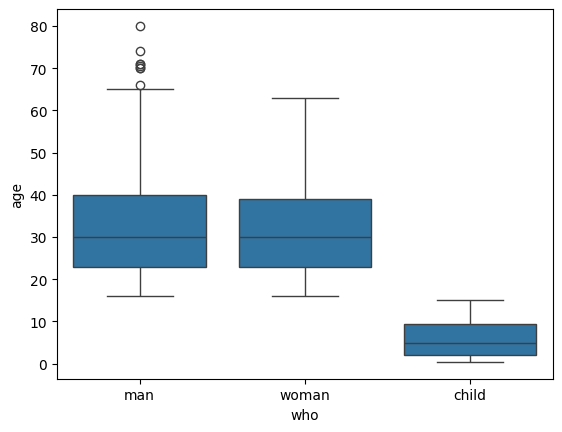

In [23]:
sns.boxplot(x='who', y = 'age', data = titanic)

<Axes: xlabel='class', ylabel='age'>

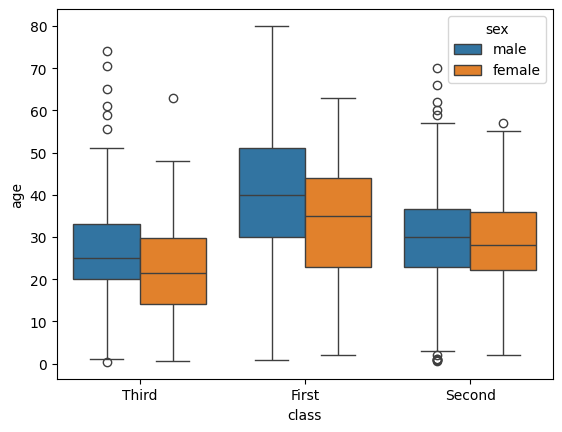

In [24]:
sns.boxplot(x='class', y = 'age', hue='sex', data = titanic)

<Axes: xlabel='survived', ylabel='age'>

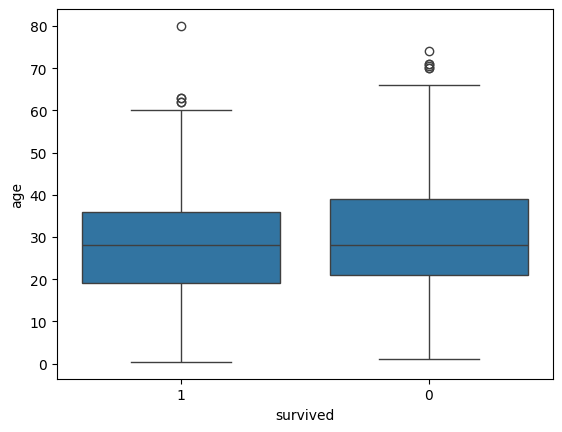

In [25]:
sns.boxplot(x='survived', y = 'age', data = titanic, order=[1,0])

(0.0, 150.0)

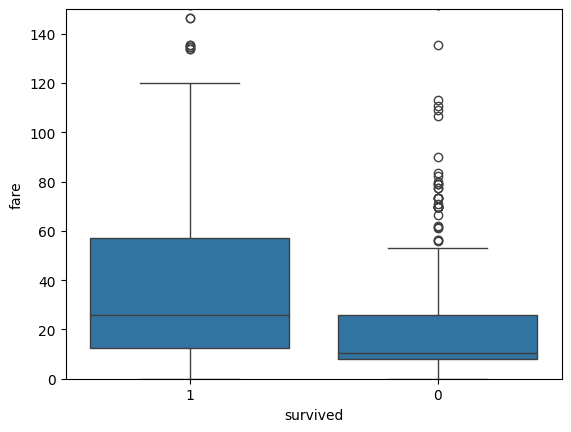

In [26]:
sns.boxplot(x='survived', y = 'fare', data = titanic, order=[1,0])
plt.ylim(0,150)

## Violin plots
http://seaborn.pydata.org/generated/seaborn.violinplot.html<br>
Similar to box plots. It visualises the whole distribution as thickness. 


- How much did people pay per class ? 
- What was the distributions of ages per class ?



C:\Users\Admin\AppData\Local\Temp\ipykernel_25244\1829795005.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='class', y = 'fare', data = titanic, palette='Set2')


<Axes: xlabel='class', ylabel='fare'>

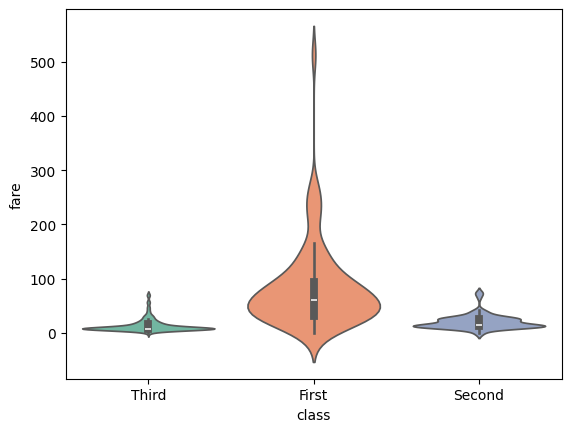

In [27]:
sns.violinplot(x='class', y = 'fare', data = titanic, palette='Set2')

C:\Users\Admin\AppData\Local\Temp\ipykernel_25244\3733957348.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='class', y = 'age', data = titanic, palette='Set2')


<Axes: xlabel='class', ylabel='age'>

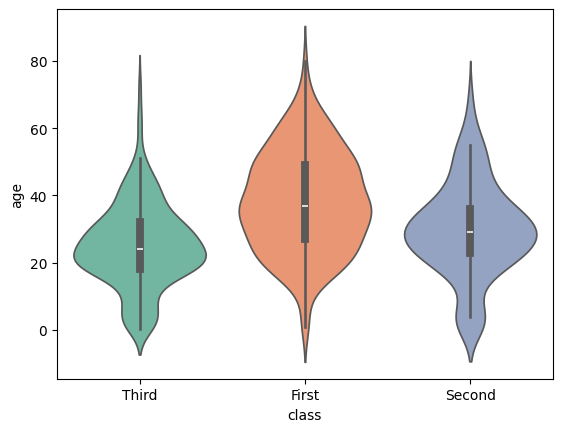

In [28]:
sns.violinplot(x='class', y = 'age', data = titanic, palette='Set2')

## KDE Plots
http://seaborn.pydata.org/generated/seaborn.kdeplot.html

Fit and plot a univariate or bivariate kernel density estimate.

- What was the age distribution in the Titanic ? 

<Axes: xlabel='age', ylabel='Density'>

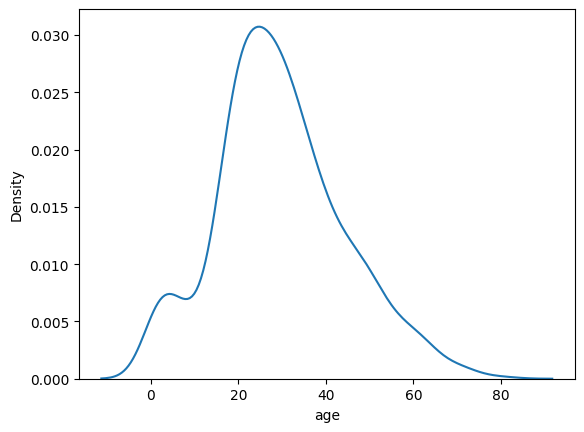

In [29]:
# We need to drop NaN (dropna)
sns.kdeplot(titanic.age.dropna())

## FacetGrid
http://seaborn.pydata.org/generated/seaborn.FacetGrid.html<br>
Allows us to plot multiple graphs in a (nested) group-by
It’s possible to condition on up to three variables by assigning variables to the rows and columns of the grid and using different colors for the plot elements.

- Lets explore the age distribution per class (hue or rows)
- Lets explore the age distribution per survival.
- Lets explore survival rates per class and per gender.

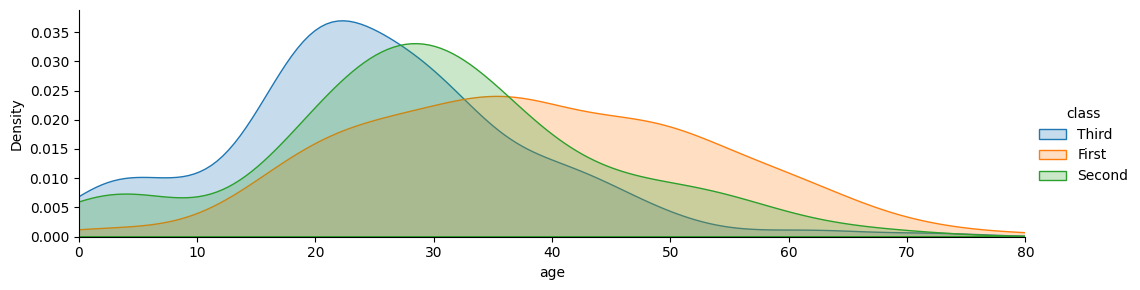

In [30]:
g = sns.FacetGrid(titanic, hue="class",aspect=3.5)
g.map(sns.kdeplot,'age',fill= True)
g.set(xlim=(0, titanic['age'].max()))
g.add_legend()
plt.show()

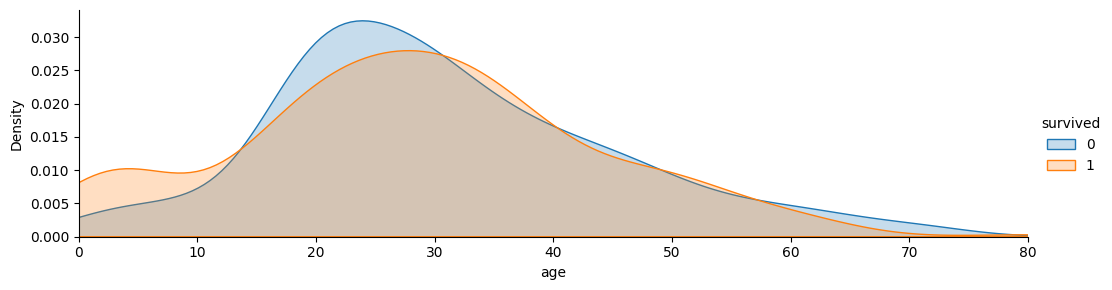

In [31]:
g = sns.FacetGrid(titanic,  hue="survived",aspect=3.5)
g.map(sns.kdeplot,'age',fill= True)
g.set(xlim=(0, titanic['age'].max()))
g.add_legend()
plt.show()

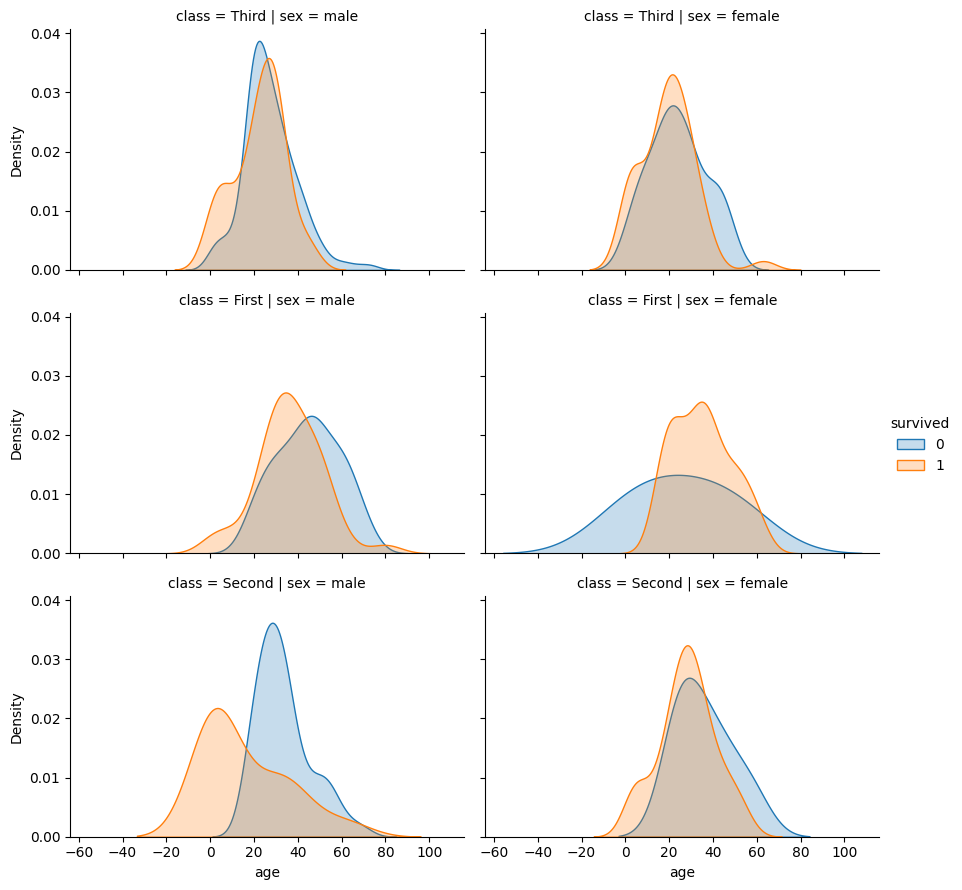

In [32]:
g = sns.FacetGrid(titanic, row="class", col = 'sex', hue='survived', aspect=1.5)
g.map(sns.kdeplot, 'age', fill=True)
g.add_legend()
plt.show()

## Joint Plot
http://seaborn.pydata.org/generated/seaborn.jointplot.html

Its a scatter plot with some added functionality
~~~
kind : { “scatter” | “reg” | “resid” | “kde” | “hex” }, optional
~~~

- is age and fare correllated ? 

(0.0, 100.0)

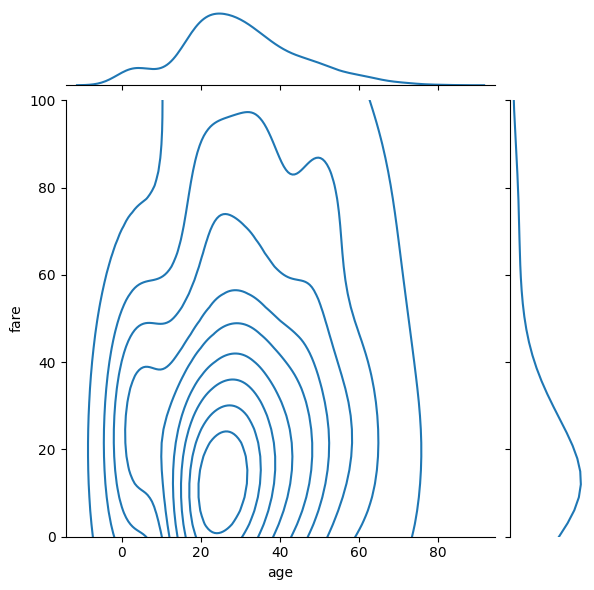

In [33]:
sns.jointplot(x='age', y = 'fare', data =titanic, kind = 'kde')
plt.ylim(0,100)

# Comparing different ways of plotting the same thing: 
Lets explore a bit more the relationship between fare and survival

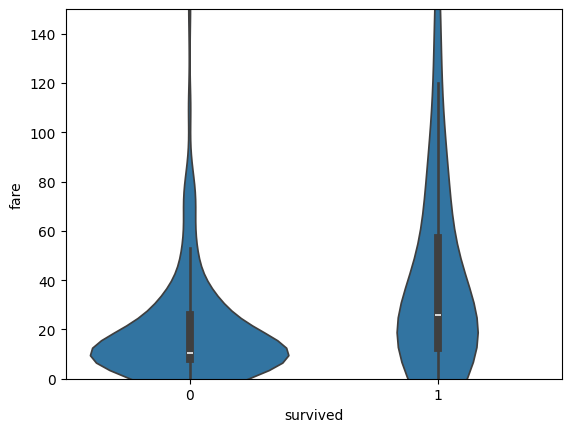

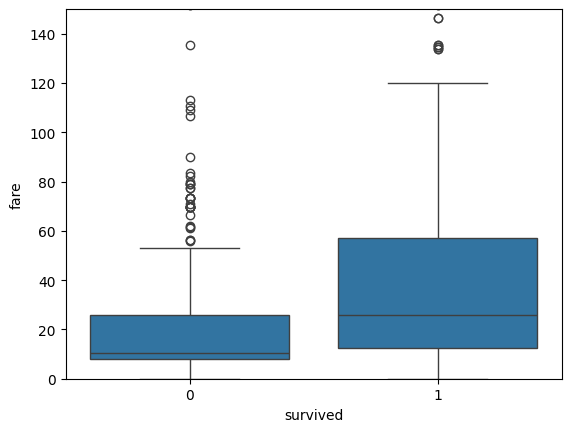

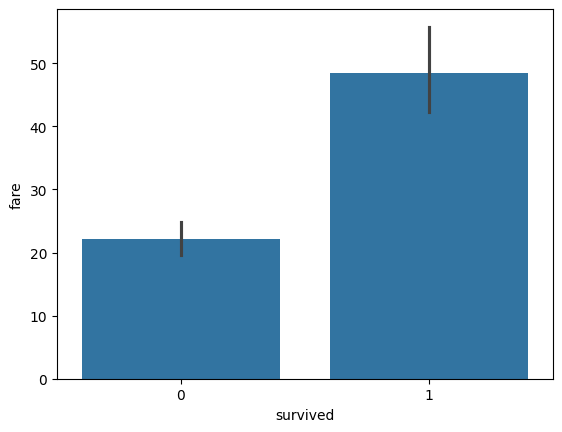

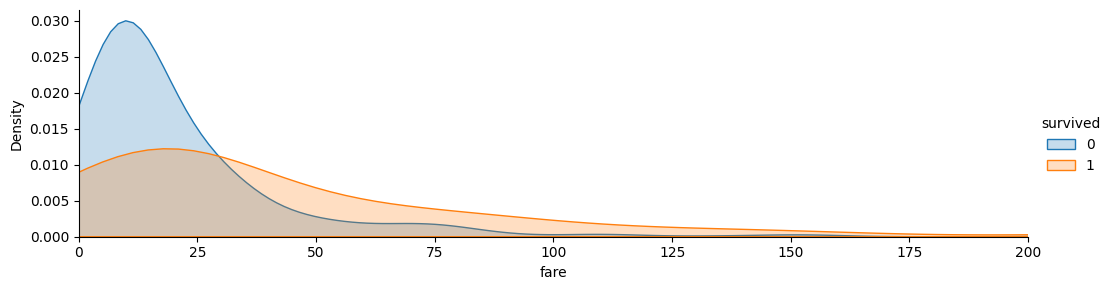

In [34]:
# Violin plot
g = sns.violinplot(x='survived', y = 'fare', data = titanic)
g.set(ylim=(0, 150))
plt.show()

# box plot
g = sns.boxplot(x='survived', y = 'fare', data = titanic)
g.set(ylim=(0, 150))
plt.show()

# bar plot
g = sns.barplot(x='survived', y = 'fare', data = titanic)
plt.show()

# kde plot
g = sns.FacetGrid(titanic, hue="survived",aspect=3.5)
g.map(sns.kdeplot,'fare',  fill= True)
g.set(xlim=(0, 200))
g.add_legend()
plt.show()

# Correllations between features. 
And plotting a heatmap
http://seaborn.pydata.org/generated/seaborn.heatmap.html

In [35]:
#Getting the pairwise correllations
corr=titanic.corr(numeric_only=True)

<Axes: >

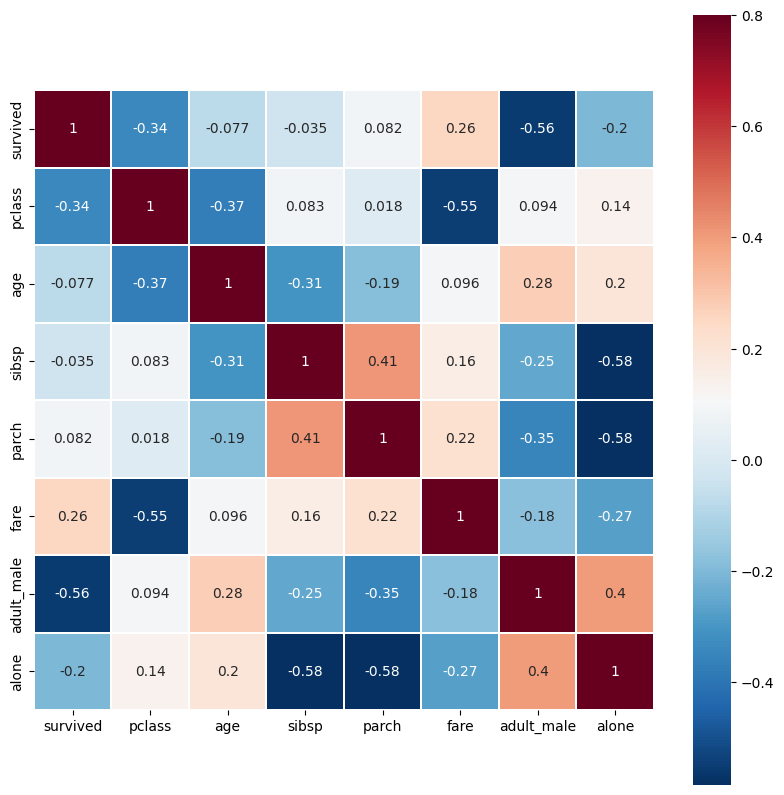

In [36]:
#plot

plt.figure(figsize=(10, 10))
sns.heatmap(corr, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='RdBu_r',linecolor="white")